In [6]:
!pip install sklearn

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from matplotlib import font_manager, rc  
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [12]:
bmi= pd.read_csv('bmi_500.csv', encoding = 'euc-kr')
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [13]:
gender=[]
for i in bmi['Gender']:
    if i =="Male":
        gender.append(1)
    else:
        gender.append(0)
bmi['Gender']=gender

In [14]:
bmi

,Gender,Height,Weight,Label
0,1,174,96,Obesity
1,1,189,87,Normal
2,0,185,110,Obesity
3,0,195,104,Overweight
4,1,149,61,Overweight
...,...,...,...,...
495,0,150,153,Extreme Obesity
496,0,184,121,Obesity
497,0,141,136,Extreme Obesity
498,1,150,95,Extreme Obesity


##### 산점도를 통한 탐색적 분석

In [15]:
bmi = pd.read_csv('bmi_500.csv', index_col='Label')
# 산점도를 표시하는 함수를 만들어보자~!
def myScatter(label, color) :
    # 원하는 레이블값을 인덱싱
    tmp = bmi.loc[label]
    # scatter : 산점도로 표시하는 명령
    plt.scatter(tmp['Weight'],     # x축 데이터 설정
                tmp['Height'],     # y축 데이터 설정
                c = color,         # 색상을 결정하는 명령
                label = label      # label로 설정하는 명령
                )

In [16]:
bmi.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

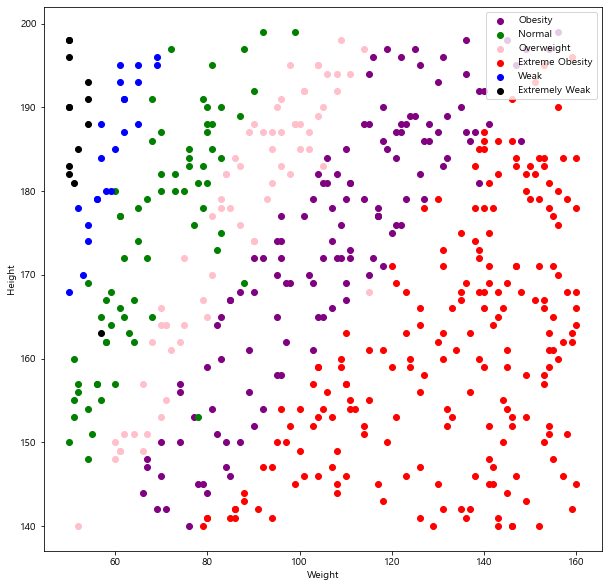

In [20]:
plt.figure(figsize=(10,10))

myScatter("Obesity", "purple")
myScatter("Normal", "green")
myScatter("Overweight", "pink")
myScatter("Extreme Obesity", "red")
myScatter("Weak", "blue")
myScatter("Extremely Weak", "black")

plt.legend(loc = "upper right")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [21]:
bmi = pd.read_csv("bmi_500.csv")
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [23]:
gender=[]
for i in bmi['Gender']:
    if i =="Male":
        gender.append(1)
    else:
        gender.append(0)
bmi['Gender']=gender
bmi

,Gender,Height,Weight,Label
0,0,174,96,Obesity
1,0,189,87,Normal
2,0,185,110,Obesity
3,0,195,104,Overweight
4,0,149,61,Overweight
...,...,...,...,...
495,0,150,153,Extreme Obesity
496,0,184,121,Obesity
497,0,141,136,Extreme Obesity
498,0,150,95,Extreme Obesity


In [24]:
#독립변수, 종속변수 구분
x = bmi.loc[:, "Height" : "Weight"]
y = bmi.loc[:, "Label"]

In [26]:
#shape: 행렬의 구성 차원을 반환
print(x.shape)
#y는 하나의 컬럼이기때문에 결과값 생략됨
print(y.shape)

(500, 2)
(500,)


In [27]:
#train-text split
x_train = x.iloc[:350, :]
y_train = y.iloc[:350]
x_test =x.iloc[350:, :]
y_test = y.iloc[350:] 

In [28]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(350, 2)
(350,)
(150, 2)
(150,)


In [40]:
#모델선정?
model = KNeighborsClassifier(n_neighbors= 10)
#밑줄: import 시켜줘야함
#model = DecisionTreeClassifier()
#model = DecisionTreeClassifier()

In [41]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [42]:
prediction = model.predict(x_test)
prediction

array(['Normal', 'Normal', 'Normal', 'Extreme Obesity', 'Extremely Weak',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Weak', 'Extreme Obesity',
       'Weak', 'Extreme Obesity', 'Extreme Obesity', 'Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Normal', 'Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Obesity',
       'Overweight', 'Normal', 'Normal', 'Normal', 'Normal', 'Overweight',
       'Extreme Obesity', 'Overweight', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Obesity', 'Normal',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Normal',
       'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Weak',
       'Obesity', 'Extreme Obes

In [43]:
metrics.accuracy_score(prediction, y_test)

0.94

In [45]:
model.predict([[180, 78]])

c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Normal'], dtype=object)